In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import LabelEncoder

In [4]:
# Files to laod
accident_data= "DataFile/mock_accident_data.csv"
#accident_data="https://umausdata.s3.amazonaws.com/DataFile/mock_accident_data.csv"
accident_df=pd.read_csv(accident_data)

In [5]:
accident_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,1417512,2,2021-12-12 13:42:00,2021-12-12 14:18:00,47.761441,-117.407294,47.751161,-117.410884,0.730,Stationary traffic on US-395 N - US-395 S from...,...,False,False,False,False,False,Day,Day,Day,Day,2021
1,2019639,2,2020-11-26 03:13:27,2020-11-26 06:13:27,45.695947,-111.046103,45.698087,-111.046103,0.148,Incident on I-90 WB near 7TH AVE Drive with ca...,...,False,False,False,True,False,Night,Night,Night,Night,2020
2,444459,2,2021-08-16 08:06:57,2021-08-16 10:09:50,25.700057,-80.412909,25.699018,-80.414553,0.125,Stationary traffic from SW 135th Ct to SW 73rd...,...,False,False,False,False,False,Day,Day,Day,Day,2021
3,1218878,2,2021-08-10 13:57:00,2021-08-10 15:37:03,43.618999,-116.243505,43.618958,-116.244466,0.048,Incident on FAIRVIEW AVE WB near ORCHARD ST Dr...,...,True,False,False,True,False,Day,Day,Day,Day,2021
4,2301904,2,2020-01-15 19:00:00,2020-01-15 19:33:23,38.439847,-121.402796,38.439847,-121.402796,0.000,At Sheldon Rd - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2020


In [6]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Severity               50000 non-null  int64  
 2   Start_Time             50000 non-null  object 
 3   End_Time               50000 non-null  object 
 4   Start_Lat              50000 non-null  float64
 5   Start_Lng              50000 non-null  float64
 6   End_Lat                50000 non-null  float64
 7   End_Lng                50000 non-null  float64
 8   Distance(mi)           50000 non-null  float64
 9   Description            50000 non-null  object 
 10  Street                 50000 non-null  object 
 11  Side                   50000 non-null  object 
 12  City                   50000 non-null  object 
 13  County                 50000 non-null  object 
 14  State                  50000 non-null  object 
 15  Zi

In [7]:
#Drop the null columns where all values are null
accident_df=accident_df.dropna(axis='columns',how='all')

In [8]:
accident_df.shape

(50000, 47)

In [9]:
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'])

In [10]:
#accident_df['year'] = pd.DatetimeIndex(accident_df['Start_Time']).year
accident_df['Month'] = pd.DatetimeIndex(accident_df['Start_Time']).month
accident_df['Day'] = pd.to_datetime(accident_df['Start_Time']).dt.day_name()

In [11]:
print(accident_df.columns)

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day'],
      dtype='object')


In [12]:
#drop the non-beneficial columns
accident_df=accident_df.drop(columns=['ID','End_Time','End_Lat','End_Lng','Description','Side','Airport_Code','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',"Start_Time",'ID','Weather_Timestamp','Zipcode','Street','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Country'])

In [13]:
accident_df.shape

(50000, 21)

In [14]:
accident_df.dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
City                  object
County                object
State                 object
Timezone              object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Sunrise_Sunset        object
Year                   int64
Month                  int64
Day                   object
dtype: object

In [15]:
accident_df=accident_df.drop(columns=[])

In [16]:
accident_df=accident_df.dropna()

In [17]:
# check Severity column
accident_df['Severity'].value_counts()

2    46476
3     1472
4     1471
1      581
Name: Severity, dtype: int64

#### converting the string values into numerical ones using label encoder

In [18]:
# To see which columns have categorical value columns
X_cat = accident_df.select_dtypes(include='object').columns
X_cat

Index(['City', 'County', 'State', 'Timezone', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Day'],
      dtype='object')

In [19]:
# examine all the columns
for column in accident_df[X_cat]:
    print(column,"\n", accident_df[column].value_counts())
    print("--------------------------------------")

City 
 Miami          2290
Los Angeles    1311
Orlando        1073
Dallas          771
Houston         652
               ... 
Victoria          1
Moyock            1
Marrero           1
Black Eagle       1
Kyle              1
Name: City, Length: 4698, dtype: int64
--------------------------------------
County 
 Los Angeles        3791
Miami-Dade         3050
Orange             2190
San Bernardino     1034
Dallas              900
                   ... 
Wapello               1
Butts                 1
Steuben               1
Richmond County       1
St. Joseph            1
Name: County, Length: 1020, dtype: int64
--------------------------------------
State 
 CA    13796
FL     7915
TX     2499
OR     2252
VA     2033
PA     2007
MN     1887
NY     1868
SC     1834
NC     1635
TN     1048
LA      986
MD      966
NJ      934
AZ      911
UT      795
MI      696
CT      525
IL      525
GA      522
WA      465
MO      410
AL      369
MT      335
CO      333
IN      270
OH      257
AR      23

In [20]:
from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()


In [21]:
# Encode single column City
#
accident_df.City = le.fit_transform(accident_df.City)
#
# Print df.head for checking the transformation

In [22]:
accident_df['City']

0        3976
1         426
2        2632
3         387
4        1244
         ... 
49995    2180
49996    1293
49997    2633
49998    2851
49999    2070
Name: City, Length: 50000, dtype: int32

In [67]:
#accident_df['City'].unique().value_counts
print(accident_df['City'].nunique())

4698


In [23]:
# Encode single column County
#
accident_df.County = le.fit_transform(accident_df.County)
#
# Print df.head for checking the transformation

In [24]:
accident_df['County']

0        853
1        336
2        584
3          3
4        787
        ... 
49995    663
49996    497
49997    584
49998    809
49999    447
Name: County, Length: 50000, dtype: int32

In [68]:
print(accident_df['County'].nunique())

1020


In [25]:
# Encode single column State
#
accident_df.State = le.fit_transform(accident_df.State)
#
# Print df.head for checking the transformation

In [26]:
accident_df['State']

0        45
1        24
2         8
3        11
4         3
         ..
49995     3
49996    36
49997     8
49998     8
49999    22
Name: State, Length: 50000, dtype: int32

In [27]:
# Encode single column Timezone 
#
accident_df.Timezone  = le.fit_transform(accident_df.Timezone)
#
# Print df.head for checking the transformation

In [28]:
accident_df['Timezone']

0        3
1        2
2        1
3        2
4        3
        ..
49995    3
49996    1
49997    1
49998    0
49999    0
Name: Timezone, Length: 50000, dtype: int32

In [29]:
# Encode single column Wind_Direction 
#
accident_df.Wind_Direction  = le.fit_transform(accident_df.Wind_Direction)
#
# Print df.head for checking the transformation

In [30]:
accident_df['Wind_Direction']

0        15
1         3
2         0
3        20
4        13
         ..
49995     0
49996     1
49997    14
49998     6
49999     0
Name: Wind_Direction, Length: 50000, dtype: int32

In [31]:
# Encode single column Weather_Condition 
#
accident_df.Weather_Condition  = le.fit_transform(accident_df.Weather_Condition)
#
# Print df.head for checking the transformation

In [32]:
accident_df['Weather_Condition']

0        42
1         9
2         9
3         9
4         5
         ..
49995    46
49996     5
49997    42
49998    42
49999    17
Name: Weather_Condition, Length: 50000, dtype: int32

In [33]:
# Encode single column Sunrise_Sunset 
#
accident_df.Sunrise_Sunset  = le.fit_transform(accident_df.Sunrise_Sunset)
#
# Print df.head for checking the transformation

In [34]:
accident_df['Sunrise_Sunset']

0        0
1        1
2        0
3        0
4        1
        ..
49995    1
49996    0
49997    1
49998    0
49999    0
Name: Sunrise_Sunset, Length: 50000, dtype: int32

In [35]:
# Encode single column Day 
#
accident_df.Day  = le.fit_transform(accident_df.Day)
#
# Print df.head for checking the transformation

In [36]:
accident_df['Day']

0        3
1        4
2        1
3        5
4        6
        ..
49995    4
49996    4
49997    0
49998    5
49999    6
Name: Day, Length: 50000, dtype: int32

In [37]:
accident_df.dtypes

Severity               int64
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
City                   int32
County                 int32
State                  int32
Timezone               int32
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction         int32
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition      int32
Sunrise_Sunset         int32
Year                   int64
Month                  int64
Day                    int32
dtype: object

#### Split the Data into Training and Testing

In [38]:
# Create our features
X = accident_df.drop("Severity",axis=1) 
X.head()

,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Year,Month,Day
0,47.761441,-117.407294,0.730,3976,853,45,3,40.0,33.0,68.0,27.63,10.0,15,10.0,0.0,42,0,2021,12,3
1,45.695947,-111.046103,0.148,426,336,24,2,18.0,10.0,81.0,25.52,10.0,3,6.0,0.0,9,1,2020,11,4
2,25.700057,-80.412909,0.125,2632,584,8,1,80.0,80.0,90.0,29.94,10.0,0,0.0,0.0,9,0,2021,8,1
3,43.618999,-116.243505,0.048,387,3,11,2,88.0,88.0,16.0,27.10,10.0,20,8.0,0.0,9,0,2021,8,5
4,38.439847,-121.402796,0.000,1244,787,3,3,47.0,47.0,71.0,29.95,10.0,13,3.0,0.0,5,1,2020,1,6


In [39]:
#Create our target
y = accident_df['Severity']
y.value_counts()

2    46476
3     1472
4     1471
1      581
Name: Severity, dtype: int64

In [40]:
# examine shape of X

X.shape

(50000, 20)

In [41]:
y.shape

(50000,)

#### Split encoded Data into Training and Testing

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

In [43]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [44]:
y_train.value_counts()

2    34849
3     1100
4     1097
1      454
Name: Severity, dtype: int64

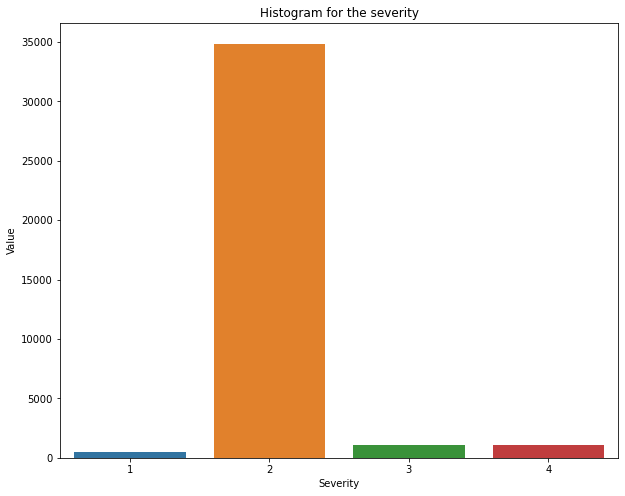

In [45]:
import matplotlib.pyplot 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

severity_counts = y_train.value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

#### Naive Random Oversampling

In [46]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled,y_resampled =ros.fit_resample(X_train,y_train)

In [47]:
# what is the "balance" or mix between Severity
Counter(y_resampled)

Counter({2: 34849, 4: 34849, 3: 34849, 1: 34849})

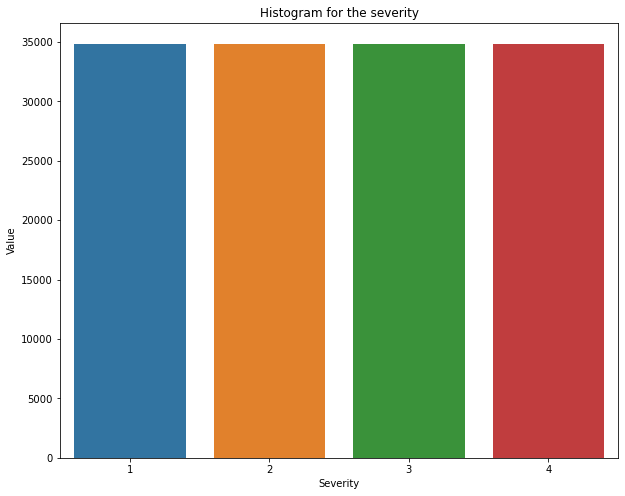

In [48]:
severity_counts = y_resampled.value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

#### Logistic Regression

In [49]:
# Train the Logistic Regression model using the resampled data
#model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs',random_state=1)
#fit
clf.fit(X_resampled,y_resampled)
#predict using the predict method
y_pred = clf.predict(X_test)

In [50]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred)


0.3846465252859053

In [51]:
# Display the confusion matrix
cm = confusion_matrix(y_test,y_pred,labels=clf.classes_)
cm

array([[  54,   31,   25,   17],
       [2594, 4063, 1854, 3116],
       [  81,   53,  133,  105],
       [  50,   84,   88,  152]], dtype=int64)

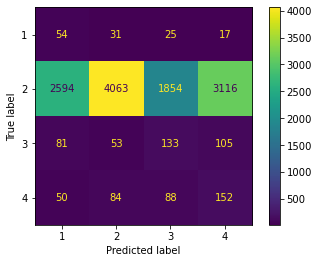

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= clf.classes_)
disp.plot()

In [53]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.02      0.43      0.78      0.04      0.58      0.32       127
          2       0.96      0.35      0.81      0.51      0.53      0.27     11627
          3       0.06      0.36      0.84      0.11      0.55      0.29       372
          4       0.04      0.41      0.73      0.08      0.55      0.29       374

avg / total       0.90      0.35      0.81      0.48      0.53      0.27     12500



#### Balanced Random Forest Classifier

In [54]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import EasyEnsembleClassifier

In [55]:
# Resample the training data with the BalancedRandomForestClassifier

#model
brf_model = BalancedRandomForestClassifier(random_state=1, n_estimators=100)
#fit
brf_model = brf_model.fit(X_train, y_train)

#predict
predictions = brf_model.predict(X_test)

In [56]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test,predictions)


0.7067954759316919

In [57]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1","Predicted 2", "Predicted 3"])

cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,110,0,16,1
Actual 1,432,8644,612,1939
Actual 2,42,6,257,67
Actual 3,14,76,87,197


In [58]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.18      0.87      0.96      0.30      0.91      0.82       127
          2       0.99      0.74      0.91      0.85      0.82      0.66     11627
          3       0.26      0.69      0.94      0.38      0.81      0.63       372
          4       0.09      0.53      0.83      0.15      0.66      0.43       374

avg / total       0.93      0.74      0.91      0.81      0.82      0.66     12500



In [59]:
# We can sort the features by their importance.
sorted (zip(brf_model.feature_importances_,X.columns),reverse=True)

[(0.1298314765901459, 'Distance(mi)'),
 (0.12040415431667235, 'Year'),
 (0.09189580543220492, 'Start_Lat'),
 (0.089422828271737, 'Start_Lng'),
 (0.07841387706974325, 'Month'),
 (0.05714636012285446, 'Pressure(in)'),
 (0.05098709084414206, 'City'),
 (0.04868508954439991, 'County'),
 (0.04736508425299026, 'State'),
 (0.045756480184360314, 'Humidity(%)'),
 (0.03998547075593196, 'Wind_Chill(F)'),
 (0.037967674922839, 'Temperature(F)'),
 (0.03273780580983489, 'Wind_Speed(mph)'),
 (0.03154047859772386, 'Wind_Direction'),
 (0.024249964590154757, 'Day'),
 (0.022483086441661707, 'Timezone'),
 (0.022247200335873785, 'Weather_Condition'),
 (0.011414998346191748, 'Visibility(mi)'),
 (0.010825210697208642, 'Sunrise_Sunset'),
 (0.006639862873329306, 'Precipitation(in)')]

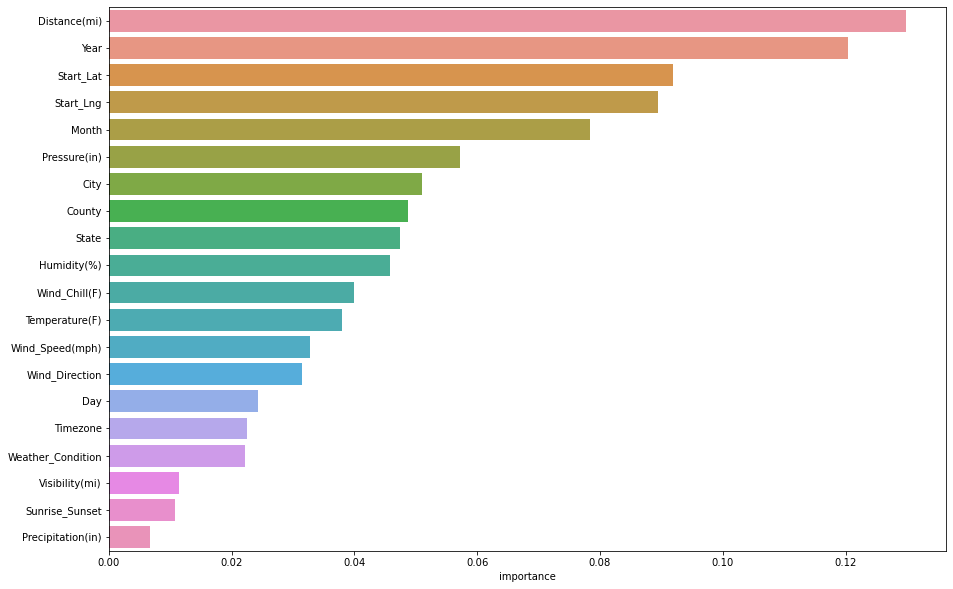

In [60]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = brf_model.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

NameError: name 'accuracy' is not defined

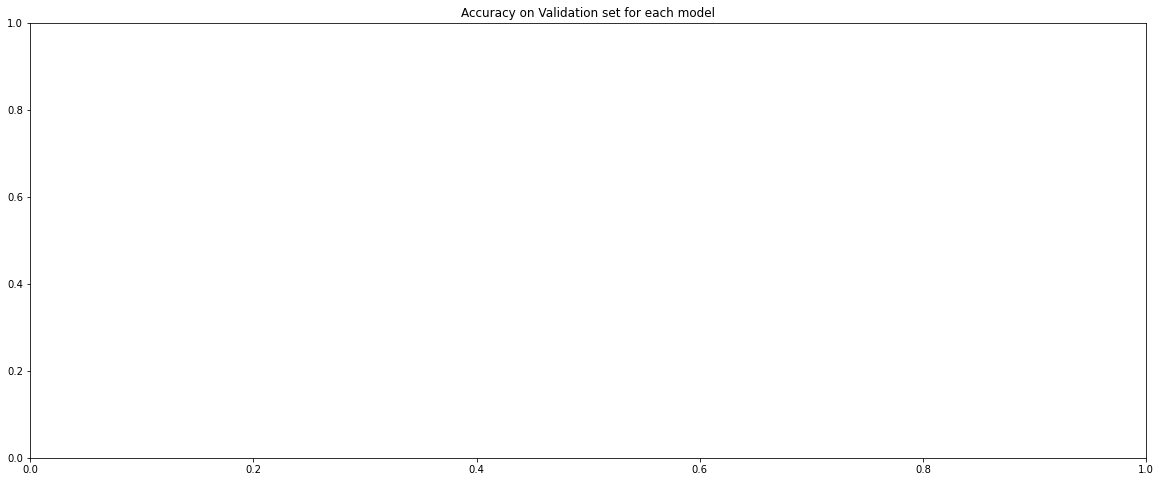

In [61]:
plt.figure(figsize=(20, 8))
plt.title("Accuracy on Validation set for each model")
sns.barplot(list(range(len(accuracy))), list(accuracy.values()))
plt.xticks(range(len(accuracy)), labels=accuracy.keys())
plt.show()